Probabilitas A (Menikah & Tanggungan > 1):
 Loan_Status
yes    0.729927
no     0.270073
Name: proportion, dtype: float64

Probabilitas B (Urban & Income > Rata-rata):
 Loan_Status
yes    0.706897
no     0.293103
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

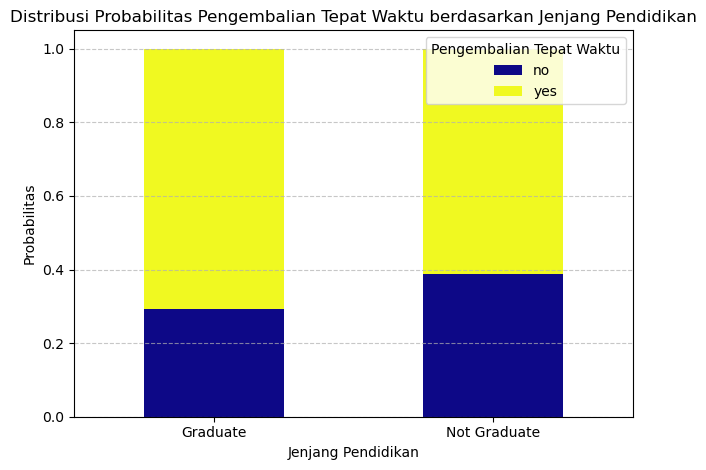

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

#Load Data
file_path = "D:/Downloads/loan_data_set.xlsx"  # Ganti sesuai path file kamu
df = pd.read_excel(file_path)

# 🧹 3. Preprocessing
df_clean = df.copy()
# Ubah '3+' ke 3, lalu ubah jadi numerik
df_clean['Dependents'] = df_clean['Dependents'].replace('3+', 3)
df_clean['Dependents'] = pd.to_numeric(df_clean['Dependents'], errors='coerce')

# Ubah status pinjaman jadi yes/no
df_clean['Loan_Status'] = df_clean['Loan_Status'].map({'Y': 'yes', 'N': 'no'})

#A. Probabilitas: Menikah & Tanggungan > 1
kondisiA = (df_clean['Married'] == 'Yes') & (df_clean['Dependents'] > 1)
prob_a = df_clean[kondisiA]['Loan_Status'].value_counts(normalize=True)
print("Probabilitas A (Menikah & Tanggungan > 1):\n", prob_a)

df_clean = df.copy()
# Ubah '3+' ke 3, lalu ubah jadi numerik
df_clean['Dependents'] = df_clean['Dependents'].replace('3+', 3)
df_clean['Dependents'] = pd.to_numeric(df_clean['Dependents'], errors='coerce')

# Ubah status pinjaman jadi yes/no
df_clean['Loan_Status'] = df_clean['Loan_Status'].map({'Y': 'yes', 'N': 'no'})

#B. Probabilitas: Property di Urban & Penghasilan di atas rata-rata
rata_rata = df_clean['ApplicantIncome'].mean()
kondisiB = (df_clean['Property_Area'] == 'Urban') & (df_clean['ApplicantIncome'] > rata_rata)
prob_b = df_clean[kondisiB]['Loan_Status'].value_counts(normalize=True)
print("\nProbabilitas B (Urban & Income > Rata-rata):\n", prob_b)

df_clean = df.copy()
# Ubah '3+' ke 3, lalu ubah jadi numerik
df_clean['Dependents'] = df_clean['Dependents'].replace('3+', 3)
df_clean['Dependents'] = pd.to_numeric(df_clean['Dependents'], errors='coerce')

# Ubah status pinjaman jadi yes/no
df_clean['Loan_Status'] = df_clean['Loan_Status'].map({'Y': 'yes', 'N': 'no'})
#C. Visualisasi Distribusi berdasarkan Education
prob = df_clean.groupby(['Education', 'Loan_Status']).size().unstack().fillna(0)
normalized = edu_prob.div(prob.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
normalized.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Distribusi Probabilitas Pengembalian Tepat Waktu berdasarkan Jenjang Pendidikan')
plt.ylabel('Probabilitas')
plt.xlabel('Jenjang Pendidikan')
plt.xticks(rotation=0)
plt.legend(title='Pengembalian Tepat Waktu')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
